<a href="https://colab.research.google.com/github/vardhankumar80/blog/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alfathterry/telco-customer-churn-11-1-3")

print("Path to dataset files:", path)

100%|██████████| 513k/513k [00:00<00:00, 24.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1


In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# List files inside the dataset folder
print(os.listdir(path))

# Load the CSV file (replace with actual filename shown in the folder)
df = pd.read_csv(os.path.join(path, "telco.csv"))

# Explore the dataset
print(df.head())
print(df.info())

['telco.csv']
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                  

In [ ]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [ ]:
#Removing unwanted columns
drop_cols = [
    "Customer ID", "Under 30", "Country", "State", "City", "Zip Code",
    "Latitude", "Longitude", "Population", "Quarter", "Offer",
    "Total Revenue", "Total Refunds", "Customer Status",
    "Churn Score", "Churn Category", "Churn Reason"
]


df = df.drop(columns=drop_cols, axis=1)

In [ ]:
df.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,3,Yes,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,3,Yes,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,2,Yes,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,2,Yes,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,2,Yes,2793


In [ ]:
#Unique Values
for column in df.columns:
  print(column, df[column].unique())

Gender ['Male' 'Female']
Age [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]
Senior Citizen ['Yes' 'No']
Married ['No' 'Yes']
Dependents ['No' 'Yes']
Number of Dependents [0 1 3 2 5 4 6 7 8 9]
Referred a Friend ['No' 'Yes']
Number of Referrals [ 0  1  6  2  4  3  7  5  8  9 10 11]
Tenure in Months [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
Phone Service ['No' 'Yes']
Avg Monthly Long Distance Charges [ 0.   48.85 11.33 ... 44.99 44.98  8.62]
Multiple Lines ['No' 'Yes']
Internet Service ['Yes' 'No']
Internet Type ['DSL' 'Fiber Optic' 'Cable' nan]
Avg Monthly GB Download [ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51

In [ ]:
#null values
df.isnull().sum()

,0
Gender,0
Age,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Referred a Friend,0
Number of Referrals,0
Tenure in Months,0
Phone Service,0


In [ ]:
df["Internet Type"] = df["Internet Type"].fillna("No Internet")
df["Internet Type"].isnull().sum()

np.int64(0)

In [ ]:
print(df['Churn Label'].value_counts())

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


#Exploratory Data Analysis(EDA)
- check distributions, outliers, correlations.

In [ ]:
df.head()
#Numerical Features -> Age, No of Dependents, Tenure in Months, Monthly Charge, Total Charges, Total Extra Data Charges, Total Long Distance Charges, Satisfaction Score, CLTV


,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,3,Yes,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,3,Yes,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,2,Yes,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,2,Yes,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,2,Yes,2793


In [ ]:
def plot_histogram(df, col):
  plt.figure(figsize=(4, 3))
  sns.histplot(df[col])
  plt.title(f"Distribution of {col}")

  mean_val = df[col].mean() #Finding Mean
  median_val = df[col].median() #Finding Median

  plt.axvline(mean_val, label="Mean", linestyle="solid", color="blue")
  plt.axvline(median_val, label="Median", linestyle="dashed", color="red")

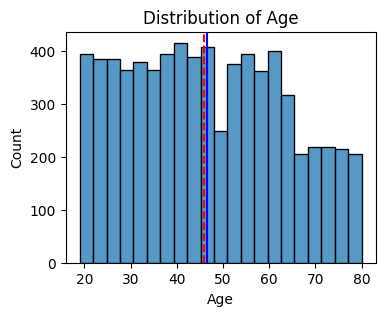

In [ ]:
plot_histogram(df, "Age")

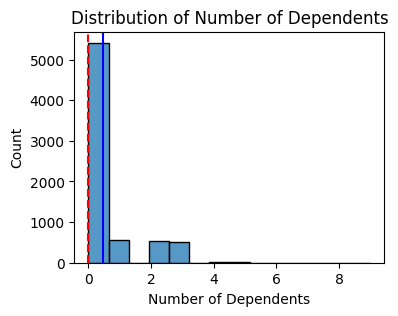

In [ ]:
plot_histogram(df, "Number of Dependents")

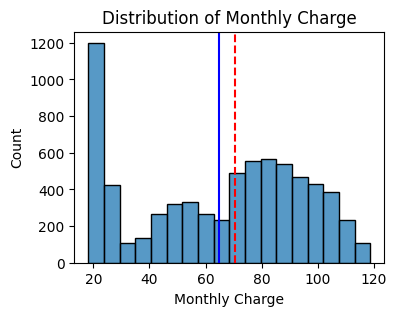

In [ ]:
plot_histogram(df, "Monthly Charge")

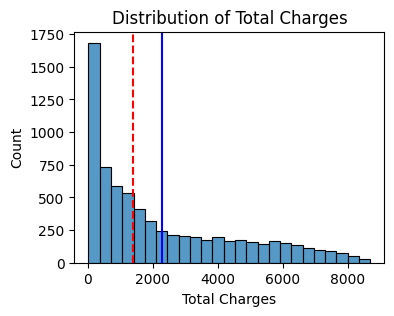

In [ ]:
plot_histogram(df, "Total Charges")

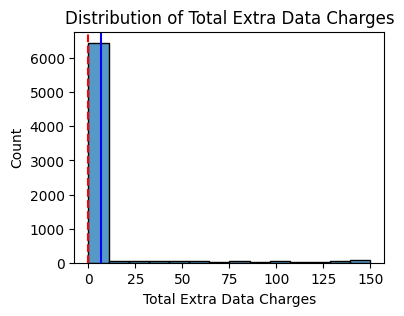

In [ ]:
plot_histogram(df, "Total Extra Data Charges")

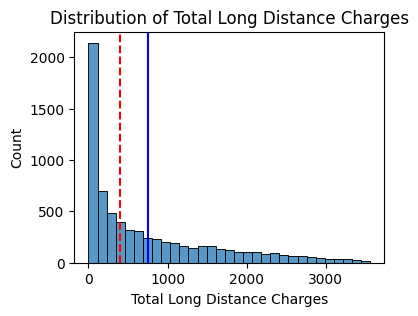

In [ ]:
plot_histogram(df, "Total Long Distance Charges")

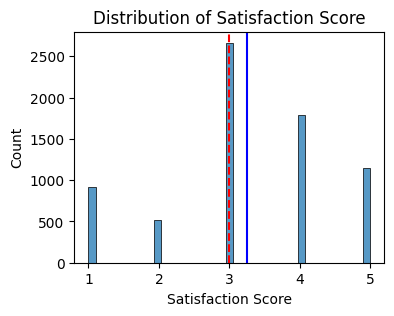

In [ ]:
plot_histogram(df, "Satisfaction Score")

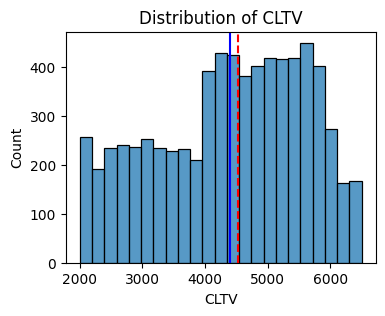

In [ ]:
plot_histogram(df, "CLTV")

In [ ]:
#To identify outliers
def plot_box_plot(df, col_name):
  plt.figure(figsize=(5,4))
  plt.title(f"Box plot of {col_name}")
  sns.boxplot(y=df[col_name])
  plt.ylabel(col_name)
  plt.show

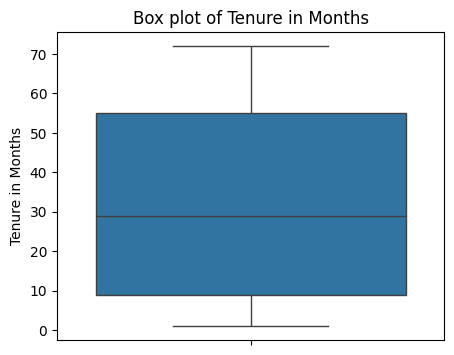

In [ ]:
plot_box_plot(df, "Tenure in Months")

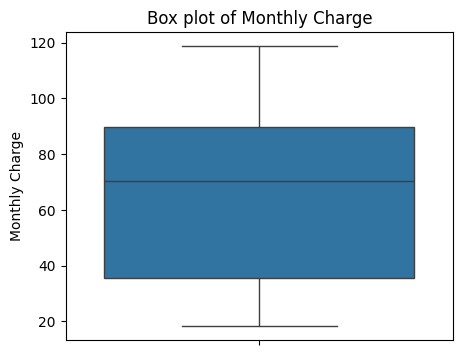

In [ ]:
plot_box_plot(df, "Monthly Charge")

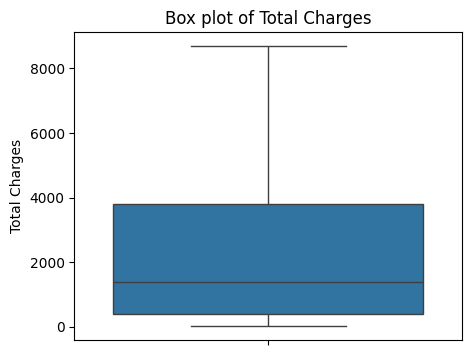

In [ ]:
plot_box_plot(df, "Total Charges")

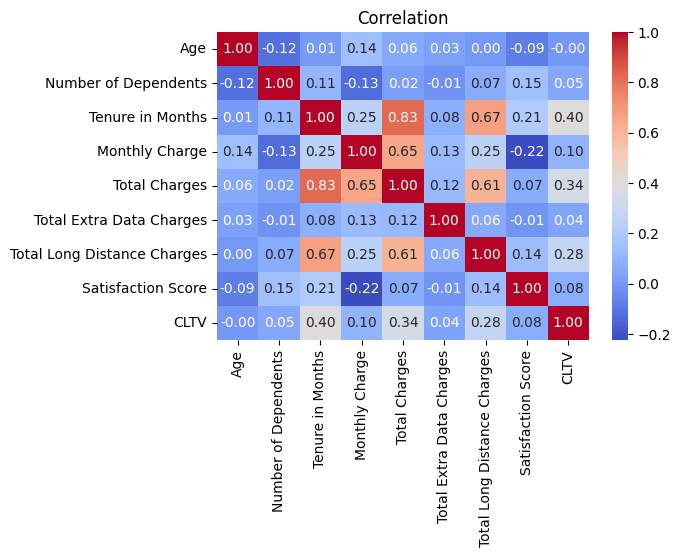

In [ ]:
#Correlation - heatmap
plt.figure(figsize=(6,4))
plt.title("Correlation")
sns.heatmap(df[["Age" , "Number of Dependents", "Tenure in Months", "Monthly Charge",
                "Total Charges", "Total Extra Data Charges", "Total Long Distance Charges",
                "Satisfaction Score", "CLTV"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
df.info()
#Categorical Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Referred a Friend                  7043 non-null   object 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Phone Service                      7043 non-null   object 
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Multiple Lines                     7043 non-null   objec

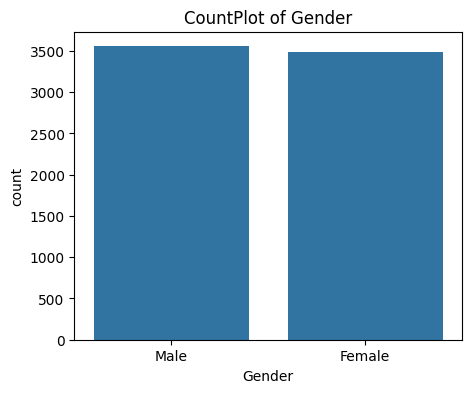

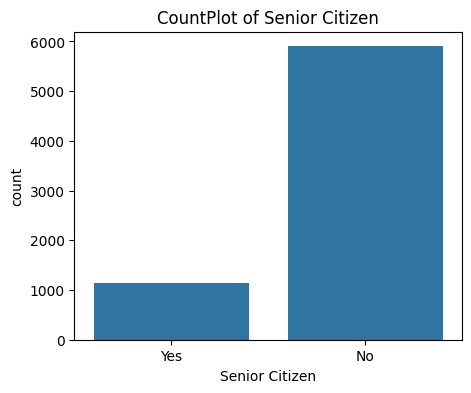

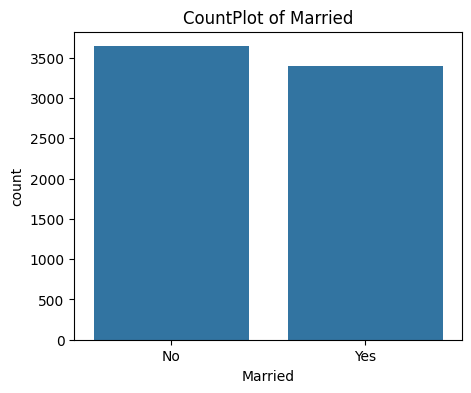

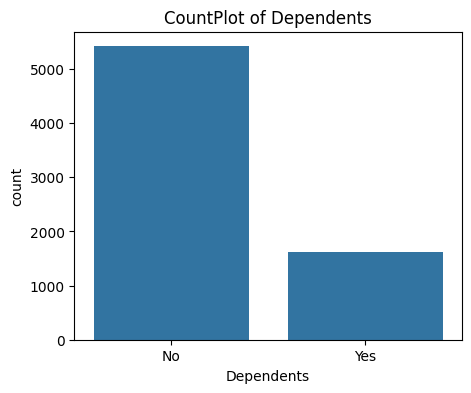

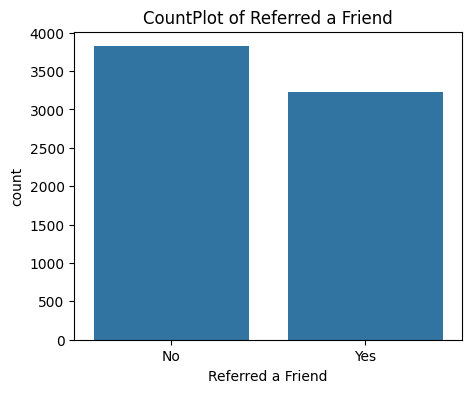

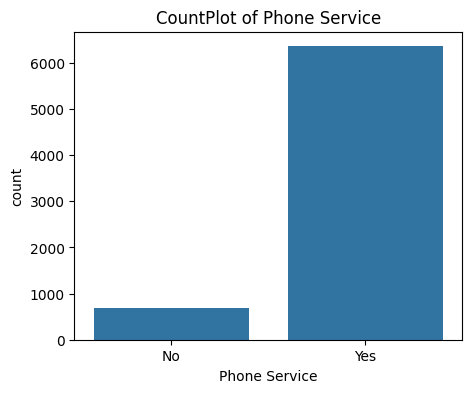

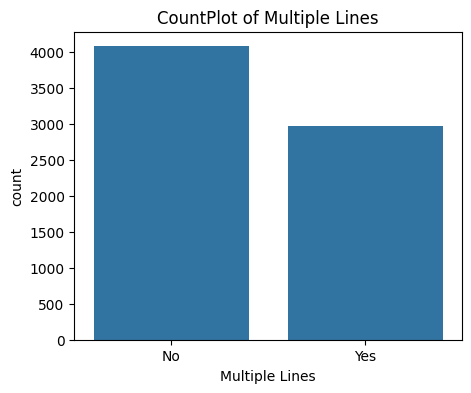

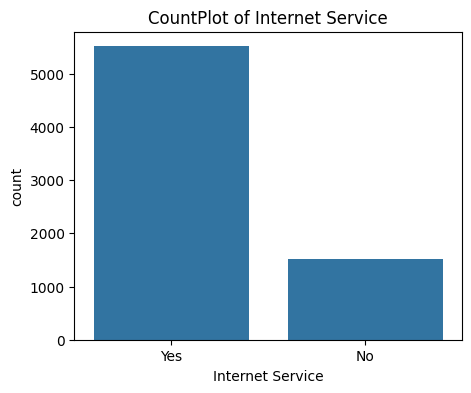

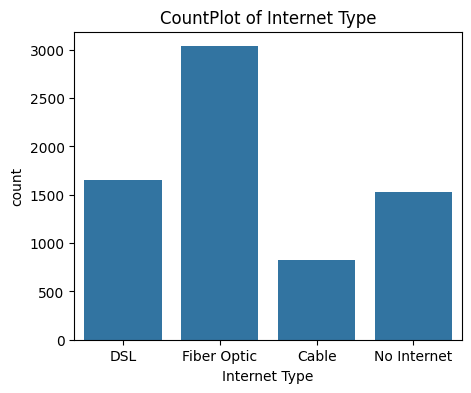

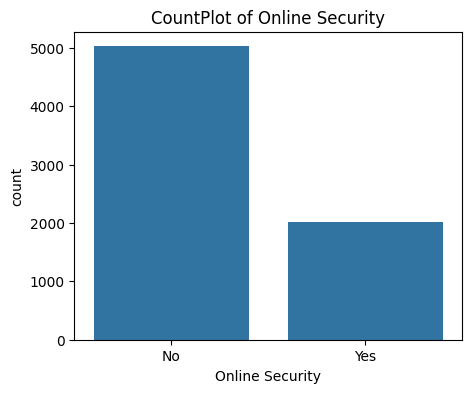

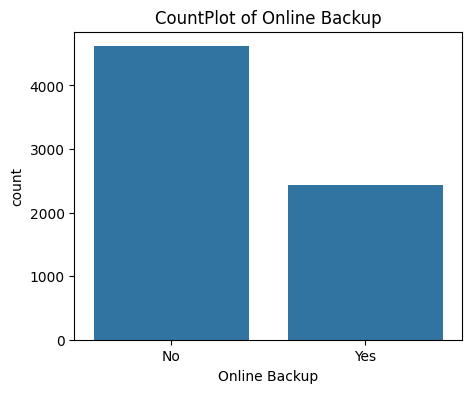

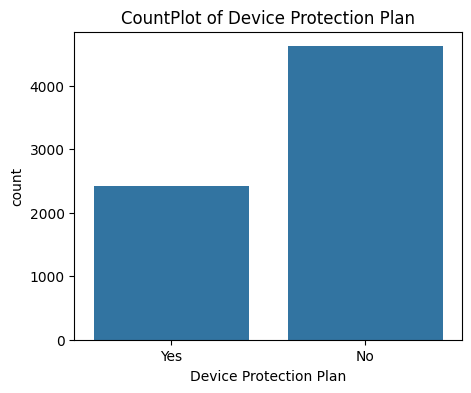

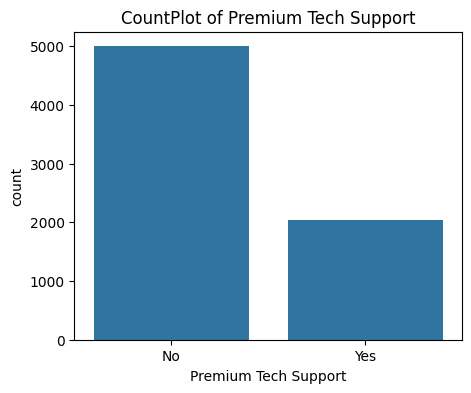

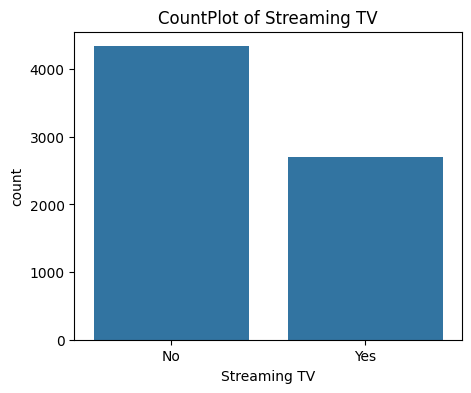

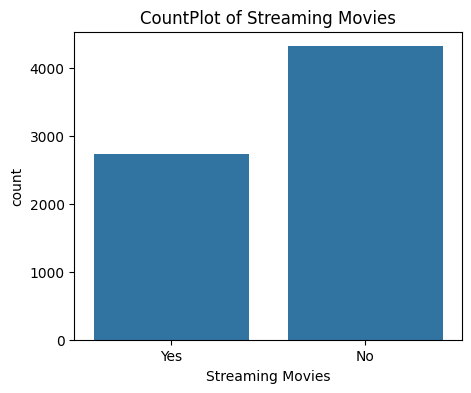

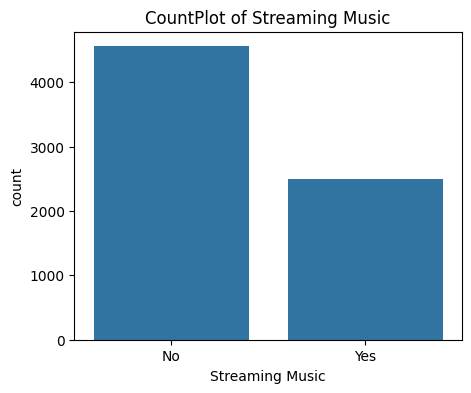

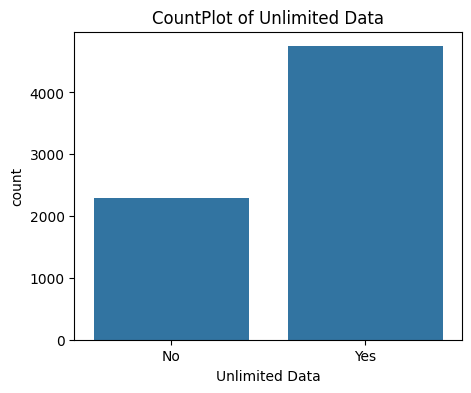

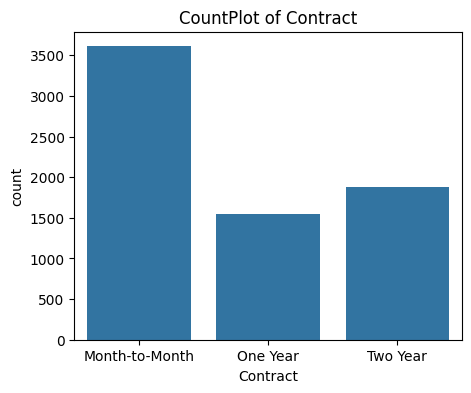

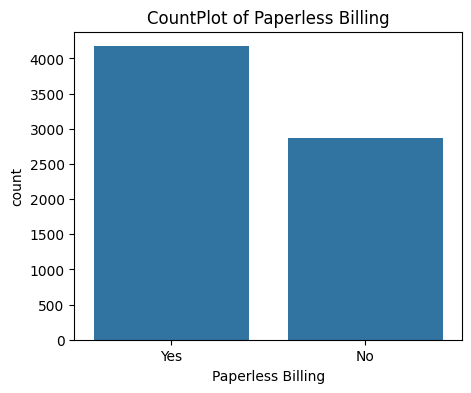

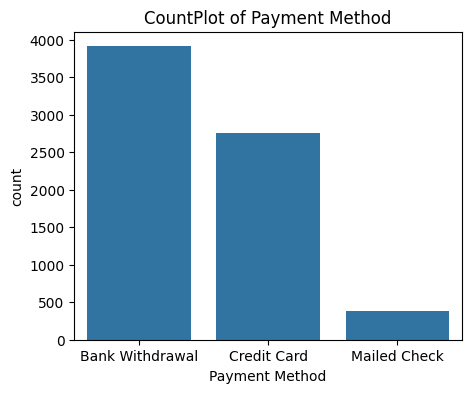

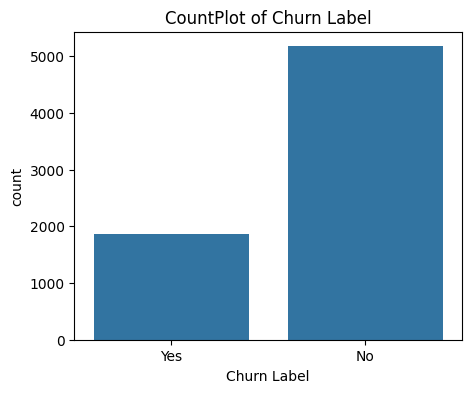

In [ ]:
object_cols = df.select_dtypes(include=["object"]).columns.to_list()

for col in object_cols:
  plt.figure(figsize=(5,4))
  plt.title(f"CountPlot of {col}")
  sns.countplot(x=df[col])
  plt.show()

#Preprocessing

In [ ]:
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Converting target values to 0 & 1
df['Churn Label'] = df['Churn Label'].replace({"Yes" : 1, "No" : 0})

/tmp/ipython-input-986630220.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn Label'] = df['Churn Label'].replace({"Yes" : 1, "No" : 0})


In [ ]:
df.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Label,CLTV
0,Male,78,Yes,No,No,0,No,0,1,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,20,0.00,3,1,5433
1,Female,74,Yes,Yes,Yes,1,Yes,1,8,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0,390.80,3,1,5302
2,Male,71,Yes,No,Yes,3,No,0,18,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,0,203.94,2,1,3179
3,Female,78,Yes,Yes,Yes,1,Yes,1,25,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,0,494.00,2,1,5337
4,Female,80,Yes,Yes,Yes,1,Yes,1,37,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0,234.21,2,1,2793


In [ ]:
#converting all object columns to numerical
encoders = {} #label encoder

for column in object_cols:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column].astype(str))
  encoders[column] = label_encoder

with open('encoders.pkl','wb') as f:
  pickle.dump(encoders, f)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Label,CLTV
0,1,78,1,0,0,0,0,0,1,0,...,0,1,0,39.65,39.65,20,0.00,3,1,5433
1,0,74,1,1,1,1,1,1,8,1,...,0,1,1,80.65,633.30,0,390.80,3,1,5302
2,1,71,1,0,1,3,0,0,18,1,...,0,1,0,95.45,1752.55,0,203.94,2,1,3179
3,0,78,1,1,1,1,1,1,25,1,...,0,1,0,98.50,2514.50,0,494.00,2,1,5337
4,0,80,1,1,1,1,1,1,37,1,...,0,1,0,76.50,2868.15,0,234.21,2,1,2793


In [76]:
# Define features and target
x = df.drop(columns=["Churn Label", "Satisfaction Score", "CLTV"])
y = df["Churn Label"]

In [ ]:
corrs = {}
for col in x.columns:
    if x[col].dtype in [np.int64, np.float64]:
        corrs[col] = np.corrcoef(x[col], y)[0,1]

print(sorted(corrs.items(), key=lambda x: abs(x[1]), reverse=True)[:10])


[('Contract', np.float64(-0.4353978613022993)), ('Tenure in Months', np.float64(-0.3528611958713403)), ('Number of Referrals', np.float64(-0.2865404715037923)), ('Dependents', np.float64(-0.2485422264232833)), ('Internet Service', np.float64(0.22789044975609252)), ('Total Long Distance Charges', np.float64(-0.2237557540880254)), ('Number of Dependents', np.float64(-0.21878018695662757)), ('Total Charges', np.float64(-0.19854608810394525)), ('Monthly Charge', np.float64(0.19335642223784683)), ('Paperless Billing', np.float64(0.19182533166646829))]


In [ ]:

print(x)

      Gender  Age  Senior Citizen  Married  Dependents  Number of Dependents  \
0          1   78               1        0           0                     0   
1          0   74               1        1           1                     1   
2          1   71               1        0           1                     3   
3          0   78               1        1           1                     1   
4          0   80               1        1           1                     1   
...      ...  ...             ...      ...         ...                   ...   
7038       0   30               0        0           0                     0   
7039       1   38               0        1           1                     2   
7040       0   30               0        1           1                     2   
7041       0   32               0        1           1                     2   
7042       1   44               0        0           0                     0   

      Referred a Friend  Number of Refe

In [ ]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64


In [ ]:
#training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.shape)

(5634,)


In [ ]:
print(x_test.shape)

(1409, 30)


In [ ]:
print("Full data:", y.value_counts())
print("Train:", y_train.value_counts())
print("Test:", y_test.value_counts())

Full data: Churn Label
0    5174
1    1869
Name: count, dtype: int64
Train: Churn Label
0    4139
1    1495
Name: count, dtype: int64
Test: Churn Label
0    1035
1     374
Name: count, dtype: int64


In [ ]:
#Resampling the data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_res, y_res = smote.fit_resample(x, y)

In [ ]:
print(y_res.value_counts())

Churn Label
1    5174
0    5174
Name: count, dtype: int64


#Training the Model

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
models = {
    "RandomForest" : RandomForestClassifier(random_state=42, class_weight="balanced"),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42),
}

#Accuracy

In [ ]:
#Cross Validation
dict_scores = {}

for model_name, model in models.items():
  print(model_name)
  scores = cross_val_score(model, x, y, cv=5, scoring="accuracy")
  dict_scores[model_name] = scores
  print(f"{model_name} Cross Validation Score: {np.mean(scores): .2f}")

RandomForest
RandomForest Cross Validation Score:  0.80
DecisionTree
DecisionTree Cross Validation Score:  0.72
XGBoost
XGBoost Cross Validation Score:  0.79


In [ ]:
dict_scores

{'RandomForest': array([0.7338538 , 0.82824698, 0.80908446, 0.81392045, 0.82386364]),
 'DecisionTree': array([0.54648687, 0.76011356, 0.77146913, 0.75923295, 0.7734375 ]),
 'XGBoost': array([0.6912704 , 0.81973031, 0.81618169, 0.81178977, 0.81605114])}

#Model Evaluation

In [ ]:
#For Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_res, y_res)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion matrix: [[1035    0]
 [   0  374]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [ ]:
#save the trained model and feature names as a pickle file
model_data = {"model":rfc, "features": x.columns.tolist()}

with open("rfc.pkl", "wb") as f:
  pickle.dump(model_data, f)

#Building Predictive System


In [74]:
with open("rfc.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features"]

print("Model loaded successfully.")
print("Feature names:", feature_names)

Model loaded successfully.
Feature names: ['Gender', 'Age', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges']


In [77]:
# Build input DataFrame
input_data = {
    "Gender": "Male",
    "Age": 78,
    "Senior Citizen": "Yes",
    "Married": "No",
    "Dependents": "No",
    "Number of Dependents": 0,
    "Referred a Friend": "No",
    "Number of Referrals": 0,
    "Tenure in Months": 1,
    "Phone Service": "No",
    "Multiple Lines": "No",
    "Internet Service": "No",
    "Internet Type": "No Internet",
    "Avg Monthly GB Download": 0,
    "Online Security": "No",
    "Online Backup": "No",
    "Device Protection Plan": "No",
    "Premium Tech Support": "No",
    "Streaming TV": "No",
    "Streaming Movies": "No",
    "Streaming Music": "No",
    "Unlimited Data": "No",
    "Contract": "Month-to-Month",
    "Paperless Billing": "Yes",
    "Payment Method": "Bank Withdrawal",
    "Monthly Charge": 39.65,
    "Total Charges": 39.65,
    "Total Extra Data Charges": 20,
    "Total Long Distance Charges": 0.00,
}  # your raw dictionary
input_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

# Only apply encoders to columns that exist in both the input_df and the encoders dictionary
for column, encoder in encoders.items():
  input_df[column] = encoder.transform(input_df[column])


prediction = loaded_model.predict(input_df)
prediction_prob = loaded_model.predict_proba(input_df)

print(prediction)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction probability: {prediction_prob}")

KeyError: 'Churn Label'